## Not A Unit Test :D 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

try:
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
except ImportError:
    import sys
    import os
    module_path = os.path.abspath('..')
    sys.path.append(module_path)
    import SafeRLBench as srb
    import SafeRLBench.envs as envs
    import SafeRLBench.tools as tools
    
np.set_printoptions(precision=5)

In [2]:
lincar = envs.LinearCar()
executer = tools.Rollout(lincar, max_it=100, abort=False)

#policy_par = lambda par: (lambda x: par[0] + par[1:].dot(x))
#policy_grad = lambda x, a: np.array([1.,x[0],x[1]]) / a

policy_par = lambda par: (lambda x: np.exp(par[0] - par[1:].dot(x)) - 1.)
policy_grad = lambda x, a, par: np.array([1.,-x[0],-x[1]])*policy_par(par)(x)

policy = tools.Policy(policy_par,(3), gradient=policy_grad, sigma=0.1)
optimizer = srb.PolicyGradient(executer, lincar, estimator='reinforce', max_it=1000, eps=0.00001,  
                               parameter_domain=np.array([0,1]), rate = 0.1)

In [3]:
policy.setParameter(np.array([1,1,1]))
trace, i, _ = executer.rollout(policy)
t = trace[10]
print(policy.log_grad(t[1],t[0]))

[ 3.56774 -2.21751 -0.33048]


In [4]:
par, conv = optimizer.optimize(policy)

Start Reinforce optimization:
Initial Parameters: [ 0.18879  0.62615  0.9958 ]
Run: 0  	Parameter: 	[ 0.18879  0.62615  0.9958 ]	Reward: -69.8263308109
		Gradient: 	[ 0.00371 -0.00093 -0.00021]
Run: 10  	Parameter: 	[ 0.19551  0.6257   0.99574]	Reward: -71.6989701051
		Gradient: 	[ 0.02146  0.00285  0.00013]
		Average Time: 	0.39s/step
Run: 20  	Parameter: 	[ 0.20339  0.62824  0.99577]	Reward: -71.7627894125
		Gradient: 	[  2.32417e-03   3.36121e-04  -4.91552e-05]
		Average Time: 	0.40s/step
Run: 30  	Parameter: 	[ 0.21375  0.62742  0.99572]	Reward: -69.6439882244
		Gradient: 	[ -4.38783e-04  -1.79658e-05   1.73653e-05]
		Average Time: 	0.39s/step
Run: 40  	Parameter: 	[ 0.21639  0.62837  0.99566]	Reward: -71.5612782934
		Gradient: 	[  5.89689e-03  -3.02332e-03   8.51929e-05]
		Average Time: 	0.48s/step
Run: 50  	Parameter: 	[ 0.22131  0.6306   0.99557]	Reward: -68.0381036416
		Gradient: 	[-0.00478  0.00302 -0.00027]
		Average Time: 	0.68s/step
Run: 60  	Parameter: 	[ 0.23008  0.63131 

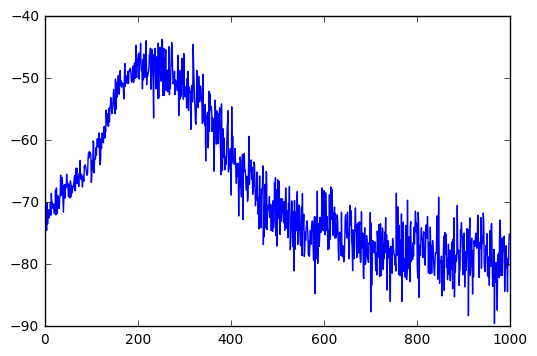

In [5]:
rewards = optimizer.rewards
plt.plot(np.arange(0,len(rewards)),rewards)
plt.show()

Best Parameter:	[ 0.48657  0.64509  0.99484]
Best Reward: 	-43.6926450539


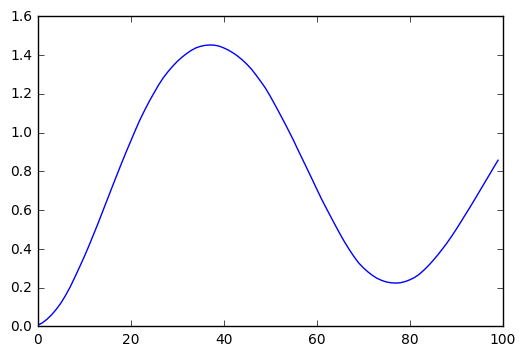

In [6]:
print("Best Parameter:\t"+str(optimizer.best_parameter))
print("Best Reward: \t"+str(optimizer.best_reward))

policy.setParameter(optimizer.best_parameter)
trace, i, achieved = executer.rollout(policy)

y = np.array([t[0] for t in [s[1] for s in trace]])
x = np.arange(0,i+1)

plt.plot(x,y)
plt.show()

In [10]:
optimizer.parameters

[array([ 0.36703,  0.87473,  0.66056]),
 array([ 0.3705 ,  0.87479,  0.66051]),
 array([ 0.36939,  0.87536,  0.6605 ]),
 array([ 0.37201,  0.87434,  0.66053]),
 array([ 0.37319,  0.8746 ,  0.66057]),
 array([ 0.37439,  0.87486,  0.66054]),
 array([ 0.37576,  0.87403,  0.66052]),
 array([ 0.37451,  0.87396,  0.66053]),
 array([ 0.37816,  0.87353,  0.6605 ]),
 array([ 0.38144,  0.87318,  0.66049]),
 array([ 0.38368,  0.87396,  0.66051]),
 array([ 0.38252,  0.87461,  0.66056]),
 array([ 0.3845 ,  0.87551,  0.66059]),
 array([ 0.38808,  0.87425,  0.66058]),
 array([ 0.38861,  0.8757 ,  0.66065]),
 array([ 0.38675,  0.87788,  0.66069]),
 array([ 0.39127,  0.87725,  0.66066]),
 array([ 0.39793,  0.87629,  0.66058]),
 array([ 0.39915,  0.87539,  0.66059]),
 array([ 0.39809,  0.876  ,  0.6606 ]),
 array([ 0.39448,  0.87642,  0.66065]),
 array([ 0.39671,  0.87712,  0.66065]),
 array([ 0.39948,  0.87747,  0.66067]),
 array([ 0.40625,  0.8765 ,  0.66059]),
 array([ 0.40493,  0.87623,  0.66058]),
